<h1>The future of tourism in Scotland</h1>

IBM Applied Data Science Capstone

by Abbey MacFarlane

In [101]:
#import required libraries

import numpy as np
import pandas as pd 
import requests 
from urllib.request import urlopen
import ssl
import csv
!pip install conda
import matplotlib
import matplotlib.pyplot as plt
from  geopy.geocoders import Nominatim

from pandas.io.json import json_normalize 

import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO 



I will now read in my expenditure/visits data to a pandas dataframe

In [6]:
scot_stats = """DateCode;Value;TypeLoc;Expend_or_Visit;
2014;186;Seaside - beach;Expenditure;
2019;1456;Small town;Expenditure;
2016;4916;All areas;Expenditure;
2018;5474;All areas;Expenditure;
2013;217;Seaside - beach;Expenditure;
2018;6;Seaside - other;Expenditure;
2018;1234;Small town;Expenditure;
2015;230;Seaside resort or town;Expenditure;
2016;302;Seaside resort or town;Expenditure;
2019;359;Seaside resort or town;Expenditure;
2017;458;Seaside resort or town;Expenditure;
2015;3922;All areas;Expenditure;
2014;5020;All areas;Expenditure;
2013;4647;All areas;Expenditure;
2016;1037;Small town;Expenditure;
2013;68;Seaside - other;Expenditure;
2013;1035;Small town;Expenditure;
2017;46;Seaside - beach;Expenditure;
2019;35;Seaside - other;Expenditure;
2015;914;Small town;Expenditure;
2016;32;Seaside - other;Expenditure;
2016;249;Seaside - beach;Expenditure;
2015;36;Seaside - other;Expenditure;
2014;128;Seaside - other;Expenditure;
2017;75;Seaside - other;Expenditure;
2015;81;Seaside - beach;Expenditure;
2019;237;Seaside - beach;Expenditure;
2018;151;Seaside - beach;Expenditure;
2019;457;Village;Expenditure;
2015;308;Village;Expenditure;
2019;3400;City/large town;Expenditure;
2018;3111;City/large town;Expenditure;
2017;1377;Small town;Expenditure;
2017;883;Village;Expenditure;
2014;1398;Small town;Expenditure;
2014;2873;City/large town;Expenditure;
2015;2254;City/large town;Expenditure;
2017;3379;City/large town;Expenditure;
2016;2630;City/large town;Expenditure;
2014;286;Seaside resort or town;Expenditure;
2013;2850;City/large town;Expenditure;
2013;206;Seaside resort or town;Expenditure;
2017;778;Rural countryside;Expenditure;
2016;520;Rural countryside;Expenditure;
2017;5995;All areas;Expenditure;
2019;429;Rural countryside;Expenditure;
2015;402;Rural countryside;Expenditure;
2018;228;Seaside resort or town;Expenditure;
2018;502;Rural countryside;Expenditure;
2016;482;Village;Expenditure;
2014;510;Village;Expenditure;
2018;651;Village;Expenditure;
2013;483;Village;Expenditure;
2014;612;Rural countryside;Expenditure;
2019;5777;All areas;Expenditure;
2013;545;Rural countryside;Expenditure;
2013;33;Small town;Visits;
2016;17;Village;Visits;
2015;32;Small town;Visits;
2013;15;Village;Visits;
2014;4;Seaside - beach;Visits;
2016;5;Seaside - beach;Visits;
2018;16;Village;Visits;
2014;12;Village;Visits;
2017;19;Village;Visits;
2017;70;City/large town;Visits;
2019;7;Seaside - beach;Visits;
2019;16;Village;Visits;
2014;35;Small town;Visits;
2018;38;Small town;Visits;
2013;59;City/large town;Visits;
2018;64;City/large town;Visits;
2016;61;City/large town;Visits;
2015;59;City/large town;Visits;
2017;8;Seaside - beach;Visits;
2019;59;City/large town;Visits;
2015;4;Seaside - beach;Visits;
2016;7;Seaside resort or town;Visits;
2015;8;Seaside resort or town;Visits;
2018;5;Seaside - beach;Visits;
2019;9;Seaside resort or town;Visits;
2013;8;Seaside resort or town;Visits;
2014;59;City/large town;Visits;
2014;8;Seaside resort or town;Visits;
2018;17;Rural countryside;Visits;
2014;19;Rural countryside;Visits;
2013;124;All areas;Visits;
2017;21;Rural countryside;Visits;
2016;22;Rural countryside;Visits;
2019;19;Rural countryside;Visits;
2014;2;Seaside - other;Visits;
2017;9;Seaside resort or town;Visits;
2018;8;Seaside resort or town;Visits;
2014;127;All areas;Visits;
2015;124;All areas;Visits;
2013;4;Seaside - beach;Visits;
2016;142;All areas;Visits;
2016;2;Seaside - other;Visits;
2017;2;Seaside - other;Visits;
2015;11;Village;Visits;
2013;18;Rural countryside;Visits;
2015;17;Rural countryside;Visits;
2016;39;Small town;Visits;
2017;40;Small town;Visits;
2019;37;Small town;Visits;
2019;134;All areas;Visits;
2018;2;Seaside - other;Visits;
2019;1;Seaside - other;Visits;
2015;2;Seaside - other;Visits;
2018;138;All areas;Visits;
2013;3;Seaside - other;Visits;
2017;151;All areas;Visits;


    """


In [19]:
df = pd.read_csv(StringIO(scot_stats), sep=";")

In [23]:
df_expend = df.head(56)

In [22]:
df_visits = df.tail(56)

Now I have read in our dataframe and split it into two based on expenditure and visits, we can now plot these on seperate graphs

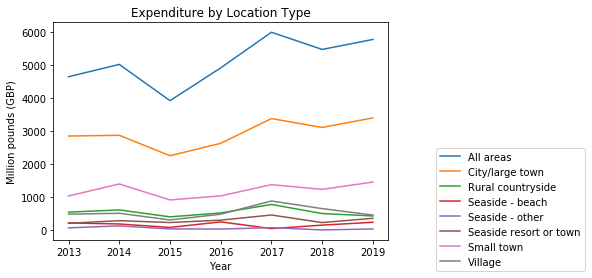

In [24]:
df_expend = df_expend[["DateCode", "Value", "TypeLoc"]].pivot(index = "DateCode", columns = "TypeLoc")
df_expend = df_expend.droplevel(0, axis=1)
for col in df_expend.columns:
    plt.plot(df_expend.index, df_expend[col], label =col)
    
plt.title('Expenditure by Location Type')
plt.ylabel('Million pounds (GBP)')
plt.xlabel('Year')
plt.legend( bbox_to_anchor=(1,0), loc="lower left", 
                          bbox_transform=plt.gcf().transFigure)


plt.show()

Aside from the aforementioned analysis, there was another noticeable anomaly where we can see a significant dip in expenditure from 2014 to 2015. A Google search of "Scotland 2014" shows at the end of 2014, Scotland held a referendum on independence. This referendum appears to have had a negative impact on tourist spending within Scotland, as reports elsewhere on the web show that there was a 4.4% rise in tourism globally in 2015. (source https://www.theguardian.com/travel/2016/jan/19/tourism-worldwide-reaches-record-levels-in-2015-in-defiance-of-terrorism-threat )

It is also public knowledge that Glasgow held the 2014 Commonwealth Olympics which may have disproportionately heightened the figures in our data for 2014.


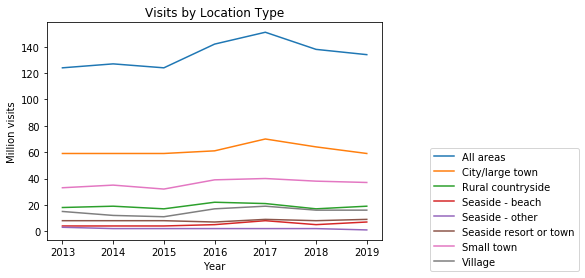

In [25]:
df_visits = df_visits[["DateCode", "Value", "TypeLoc"]].pivot(index = "DateCode", columns = "TypeLoc")
df_visits = df_visits.droplevel(0, axis=1)
for col in df_visits.columns:
    plt.plot(df_visits.index, df_visits[col], label =col)
    
plt.title('Visits by Location Type')
plt.ylabel('Million visits')
plt.xlabel('Year')
plt.legend( bbox_to_anchor=(1,0), loc="lower left", 
                          bbox_transform=plt.gcf().transFigure)

plt.show()

from both of the graphs above we can see that City/large town is the most popular type of holiday in Scotand. 

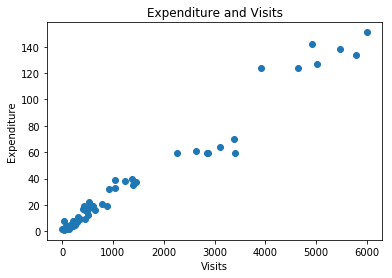

In [47]:
plt.scatter(df_expend, df_visits)

plt.title('Expenditure and Visits')
plt.ylabel('Expenditure')
plt.xlabel('Visits')

plt.show()

we can see from the above scatter graph that there is a positive linear correlation between expenditure and visits.

We will now be webscraping from wikipedia a List of Towns and Cities in Scotland by Population

In [54]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd 
import requests 
from urllib.request import urlopen
import ssl
import csv

In [55]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_towns_and_cities_in_Scotland_by_population').text

soup = BeautifulSoup(source, 'lxml')

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of towns and cities in Scotland by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"304da61b-7cbb-4be1-ab1b-289487e230f9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_towns_and_cities_in_Scotland_by_population","wgTitle":"List of towns and cities in Scotland by population","wgCurRevisionId":946192509,"wgRevisionId":946192509,"wgArticleId":14184004,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short

In [56]:
wiki_table = soup.find('table',{'class':'wikitable sortable'})

In [57]:
wiki_table_rows = wiki_table.find_all('tr')

In [84]:
data = []
for row in wiki_table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

scot_pop = pd.DataFrame(data, columns=[ 'Locality', 'Population', 'Status', 'Council Area'])
scot_pop = scot_pop[~scot_pop['Locality'].isnull()]  

as the wikipedia table is already in sorted order, let's just take a small sample for visualisation

In [94]:
scot_pop_top = scot_pop.head(4)
scot_pop_top

,Locality,Population,Status,Council Area
1,Glasgow,"612,040",City,Glasgow City
2,Edinburgh,"488,050",City,City of Edinburgh
3,Aberdeen,"200,680",City,Aberdeen City
4,Dundee,"148,280",City,Dundee City


In [95]:
scot_pop_top= scot_pop_top.sort_values('Population',ascending=True)

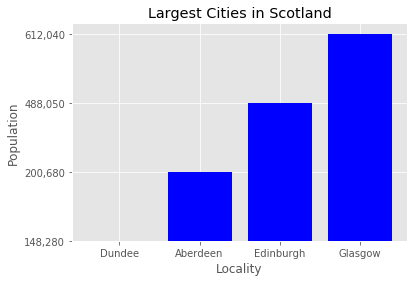

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = scot_pop_top.Locality
population = scot_pop_top.Population

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, population, color='blue')
plt.xlabel("Locality")
plt.ylabel("Population")
plt.title("Largest Cities in Scotland")

plt.xticks(x_pos, x)

plt.show()

from the above table and bar chart, we can clearly see that Glasgow and Edinburgh are the two largest cities by population

We will now be focusing on Scotland's two largest cities: Glasgow and Edinburgh. <br> We will be leveredging the Foursquare API to compare the two cities.

In [48]:
CLIENT_ID = 'SOZGVHMEZJEZFQAASIM02C3JOMBVGW0YCNANWCNL0XS5RFNC' 
CLIENT_SECRET = 'DKLKNMCK13C1P2URY4D4SRRYSEM0RFSWTAU0FYVZ4KMG5HUI' 
VERSION = '20200808'
RADIUS=1000
LIMIT=100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SOZGVHMEZJEZFQAASIM02C3JOMBVGW0YCNANWCNL0XS5RFNC
CLIENT_SECRET:DKLKNMCK13C1P2URY4D4SRRYSEM0RFSWTAU0FYVZ4KMG5HUI


In [51]:
G_address = 'Glasgow, UK'

geolocator = Nominatim(user_agent="ny_explorer")
G_location = geolocator.geocode(G_address)
G_latitude = G_location.latitude
G_longitude = G_location.longitude
print('The geograpical coordinate of Glasgow are {}, {}.'.format(G_latitude, G_longitude))

The geograpical coordinate of Glasgow are 55.8609825, -4.2488787.


In [53]:
E_address = 'Edinburgh, UK'

geolocator = Nominatim(user_agent="ny_explorer")
E_location = geolocator.geocode(E_address)
E_latitude = E_location.latitude
E_longitude = E_location.longitude
print('The geograpical coordinate of Edinburgh are {}, {}.'.format(E_latitude, E_longitude))

The geograpical coordinate of Edinburgh are 55.9533456, -3.1883749.


We will be using the same radius and limit for both Cities and determine from the number of results returned which city would be best for that kind of activity.

In [103]:
G_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=1000&limit=500&query=museum'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            G_latitude, 
            G_longitude,
            RADIUS
                )

In [104]:
G_results = requests.get(G_url).json()
G_results

{'meta': {'code': 200, 'requestId': '5f39049a88d9f22c7a28701c'},
 'response': {'headerLocation': 'Merchant City',
  'headerFullLocation': 'Merchant City, Glasgow',
  'headerLocationGranularity': 'neighborhood',
  'query': 'museum',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 55.86998250900001,
    'lng': -4.232871642319707},
   'sw': {'lat': 55.85198249099999, 'lng': -4.264885757680292}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c989aee4804a14374a9ec0e',
       'name': "Provand's Lordship",
       'location': {'address': '3 Castle St',
        'lat': 55.86226808987698,
        'lng': -4.237062829610461,
        'labeledLatLngs': [{'label': 'display',
          'lat': 55.86226808987698,
          'lng': -4.237062829610461}],
        'distance': 751,
 

In [107]:
def get_category_type(row):
    try:
        G_categories_list = row['categories']
    except:
        G_categories_list = row['venue.categories']
        
    if len(G_categories_list) == 0:
        return None
    else:
        return G_categories_list[0]['name']

In [108]:
G_venues = G_results['response']['groups'][0]['items']
    
G_museums = json_normalize(G_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
G_museums =G_museums.loc[:, filtered_columns]

# filter the category for each row
G_museums['venue.categories'] = G_museums.apply(get_category_type, axis=1)

# clean columns
G_museums.columns = [col.split(".")[-1] for col in G_museums.columns]

G_museums

,name,categories,lat,lng
0,Provand's Lordship,Historic Site,55.862268,-4.237063
1,The National Piping Centre,Music Venue,55.866891,-4.256609
2,St Mungo Museum of Religious Life & Art,Museum,55.862464,-4.236415
3,Glasgow Police Museum,History Museum,55.858125,-4.244892


In [109]:
E_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=1000&limit=500&query=museum'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            E_latitude, 
            E_longitude,
            RADIUS
                )

In [110]:
E_results = requests.get(E_url).json()
E_results

{'meta': {'code': 200, 'requestId': '5f39057d2f553b562366b4ff'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Canongate',
  'headerFullLocation': 'Canongate, Edinburgh',
  'headerLocationGranularity': 'neighborhood',
  'query': 'museum',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 55.96234560900001,
    'lng': -3.1723296742147205},
   'sw': {'lat': 55.94434559099999, 'lng': -3.2044201257852793}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ec5451f4690b682a42a3bd5',
       'name': 'Scottish National Portrait Gallery',
       'location': {'address': '1 Queen St',
        'lat': 55.95567576474659,
        'lng': -3.193455273206641,
        'labeledLatLngs': [{'la

In [111]:
def get_category_type(row):
    try:
        E_categories_list = row['categories']
    except:
        E_categories_list = row['venue.categories']
        
    if len(E_categories_list) == 0:
        return None
    else:
        return E_categories_list[0]['name']

In [112]:
E_venues = E_results['response']['groups'][0]['items']
    
E_museums = json_normalize(E_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
E_museums =E_museums.loc[:, filtered_columns]

# filter the category for each row
E_museums['venue.categories'] = E_museums.apply(get_category_type, axis=1)

# clean columns
E_museums.columns = [col.split(".")[-1] for col in E_museums.columns]

E_museums

,name,categories,lat,lng
0,Scottish National Portrait Gallery,Art Gallery,55.955676,-3.193455
1,Scottish Storytelling Centre,Museum,55.950574,-3.184761
2,The National Archives of Scotland,History Museum,55.953430,-3.189253
3,Scottish National Gallery,Art Museum,55.951020,-3.195721
4,National Museum of Scotland,Museum,55.947254,-3.189315
5,The Edinburgh Dungeon,General Entertainment,55.951130,-3.190911
6,Camera Obscura and World of Illusions,Science Museum,55.949121,-3.195520
7,The Writers' Museum,History Museum,55.949722,-3.193443
8,The Scotch Whisky Experience,Museum,55.948841,-3.195909
9,Old City Observatory,Planetarium,55.954684,-3.183477


In [164]:
E = E_museums.count()

E

name          30
categories    30
lat           30
lng           30
dtype: int64

In [165]:
G = G_museums.count()

G

name          4
categories    4
lat           4
lng           4
dtype: int64

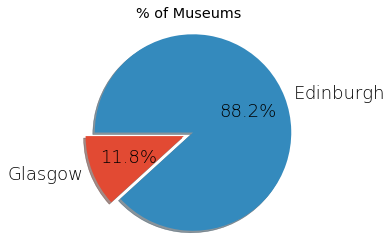

In [188]:

labels = 'Glasgow', 'Edinburgh'
sizes = [4, 30]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=180, textprops={ 'weight':'50', 'size':'18'})
ax1.axis('equal') 

plt.title('% of Museums')

plt.show()

from this we can say that Edinburgh has far more Museums than Glasgow and therefore would be a more attractive destination for individuals who want to visit museums

In [197]:
G_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=10000&limit=500&query=soccer stadium'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            G_latitude, 
            G_longitude,
            RADIUS
                )

In [198]:
G_results = requests.get(G_url).json()
G_results

{'meta': {'code': 200, 'requestId': '5f390cc603cd7d164bdb5394'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Glasgow',
  'headerFullLocation': 'Glasgow',
  'headerLocationGranularity': 'city',
  'query': 'soccer stadium',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 55.95098259000009,
    'lng': -4.088808123197075},
   'sw': {'lat': 55.77098240999991, 'lng': -4.408949276802924}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b11505bf964a520237a23e3',
       'name': 'Celtic Park',
       'location': {'address': '18 Kerrydale St',
        'lat': 55.849902,
        'lng': -4.205619,
        'labeledLatLngs': [{'label': 'display',
          'lat': 55.849902,
        

In [199]:
def get_category_type(row):
    try:
        G_categories_list = row['categories']
    except:
        G_categories_list = row['venue.categories']
        
    if len(G_categories_list) == 0:
        return None
    else:
        return G_categories_list[0]['name']

In [200]:
G_venues = G_results['response']['groups'][0]['items']
    
G_football = json_normalize(G_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
G_football =G_football.loc[:, filtered_columns]

# filter the category for each row
G_football['venue.categories'] = G_football.apply(get_category_type, axis=1)

# clean columns
G_football.columns = [col.split(".")[-1] for col in G_football.columns]

G_football

,name,categories,lat,lng
0,Celtic Park,Soccer Stadium,55.849902,-4.205619
1,Ibrox Stadium,Soccer Stadium,55.852956,-4.307883
2,Hampden Park,Soccer Stadium,55.825563,-4.251821
3,Firhill Stadium,Soccer Stadium,55.881522,-4.269605


In [201]:
E_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=10000&limit=500&query=soccer stadium'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            E_latitude, 
            E_longitude,
            RADIUS
                )

In [202]:
E_results = requests.get(E_url).json()
E_results

{'meta': {'code': 200, 'requestId': '5f390f5c94af785f948f85a2'},
 'response': {'headerLocation': 'Edinburgh',
  'headerFullLocation': 'Edinburgh',
  'headerLocationGranularity': 'city',
  'query': 'soccer stadium',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 56.04334569000009,
    'lng': -3.027922642147205},
   'sw': {'lat': 55.86334550999991, 'lng': -3.348827157852795}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b058823f964a52044b422e3',
       'name': 'Tynecastle Park',
       'location': {'address': 'McLeod St',
        'crossStreet': 'at Gorgie Rd',
        'lat': 55.938818612258586,
        'lng': -3.2321304842342315,
        'labeledLatLngs': [{'label': 'display',
          'lat': 55.938818612258586,
          'lng': -3.2321304842342315}],
     

In [203]:
def get_category_type(row):
    try:
        E_categories_list = row['categories']
    except:
        E_categories_list = row['venue.categories']
        
    if len(E_categories_list) == 0:
        return None
    else:
        return E_categories_list[0]['name']

In [204]:
E_venues = E_results['response']['groups'][0]['items']
    
E_football = json_normalize(E_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
E_football =E_football.loc[:, filtered_columns]

# filter the category for each row
E_football['venue.categories'] = E_football.apply(get_category_type, axis=1)

# clean columns
E_football.columns = [col.split(".")[-1] for col in E_football.columns]

E_football

,name,categories,lat,lng
0,Tynecastle Park,Soccer Stadium,55.938819,-3.232130
1,Easter Road Stadium,Soccer Stadium,55.961762,-3.165777
2,The East Stand,Soccer Stadium,55.961537,-3.166015
3,Famous Five Stand,Soccer Stadium,55.962504,-3.164883


In [207]:
G = G_football.count()
E = E_football.count()
G


name          4
categories    4
lat           4
lng           4
dtype: int64

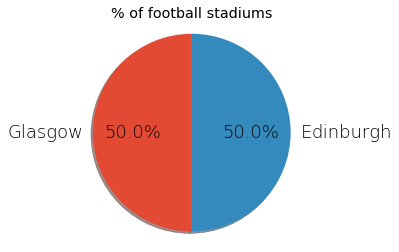

In [209]:

labels = 'Glasgow', 'Edinburgh'
sizes = [4, 4]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={ 'weight':'50', 'size':'18'})
ax1.axis('equal') 

plt.title('% of football stadiums')

plt.show()

This shows that people who want to visit football stadiums would be equally likely to enjoy Glasgow or Edinburgh

In [250]:
G_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=500&limit=500&query=night club'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            G_latitude, 
            G_longitude,
            RADIUS
                )

In [251]:
G_results = requests.get(G_url).json()
G_results

{'meta': {'code': 200, 'requestId': '5f391296f7e86f7793597c9a'},
 'response': {'headerLocation': 'Merchant City',
  'headerFullLocation': 'Merchant City, Glasgow',
  'headerLocationGranularity': 'neighborhood',
  'query': 'night club',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 55.8654825045, 'lng': -4.240875171159853},
   'sw': {'lat': 55.856482495499996, 'lng': -4.256882228840146}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bac6b08f964a52041f43ae3',
       'name': '29 Private Members Club',
       'location': {'address': '29 Royal Exchange Square',
        'lat': 55.860003640060945,
        'lng': -4.253428942682127,
        'labeledLatLngs': [{'label': 'display',
          'lat': 55.860003640060945,
          'lng': -4.253428942682127}],
        '

In [252]:
def get_category_type(row):
    try:
        G_categories_list = row['categories']
    except:
        G_categories_list = row['venue.categories']
        
    if len(G_categories_list) == 0:
        return None
    else:
        return G_categories_list[0]['name']

In [261]:
G_venues = G_results['response']['groups'][0]['items']
    
G_nightclub = json_normalize(G_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
G_nightclub =G_nightclub.loc[:, filtered_columns]

# filter the category for each row
G_nightclub['venue.categories'] = G_nightclub.apply(get_category_type, axis=1)

# clean columns
G_nightclub.columns = [col.split(".")[-1] for col in G_nightclub.columns]

G_nightclub

,name,categories,lat,lng
0,29 Private Members Club,Nightclub,55.860004,-4.253429
1,The Corinthian,Bar,55.859551,-4.249751
2,Sugar Cube,Nightclub,55.858683,-4.252365
3,Chambre 69,Nightclub,55.861786,-4.253729
4,Polo Lounge,Nightclub,55.858990,-4.249566
5,Reflex,Nightclub,55.862448,-4.256290
6,Maggie May's,Pub,55.857049,-4.245212
7,AXM,Nightclub,55.859443,-4.248638


In [246]:
E_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=500&limit=1000&query=nightclub'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            E_latitude, 
            E_longitude,
            RADIUS
                )

In [247]:
E_results = requests.get(E_url).json()
E_results

{'meta': {'code': 200, 'requestId': '5f391300cf2d854abd478f23'},
 'response': {'headerLocation': 'Canongate',
  'headerFullLocation': 'Canongate, Edinburgh',
  'headerLocationGranularity': 'neighborhood',
  'query': 'nightclub',
  'totalResults': 7,
  'suggestedBounds': {'ne': {'lat': 55.9578456045, 'lng': -3.18035228710736},
   'sw': {'lat': 55.948845595499996, 'lng': -3.1963975128926396}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b733b97f964a5206ba32de3',
       'name': 'The Banshee Labyrinth',
       'location': {'address': '29-35 Niddry St',
        'lat': 55.94939260437952,
        'lng': -3.1868430031068313,
        'labeledLatLngs': [{'label': 'display',
          'lat': 55.94939260437952,
          'lng': -3.1868430031068313}],
        'distance': 450,
  

In [248]:
def get_category_type(row):
    try:
        E_categories_list = row['categories']
    except:
        E_categories_list = row['venue.categories']
        
    if len(E_categories_list) == 0:
        return None
    else:
        return E_categories_list[0]['name']

In [263]:
E_venues = E_results['response']['groups'][0]['items']
    
E_nightclub = json_normalize(E_venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
E_nightclub =E_nightclub.loc[:, filtered_columns]

# filter the category for each row
E_nightclub['venue.categories'] = E_nightclub.apply(get_category_type, axis=1)

# clean columns
E_nightclub.columns = [col.split(".")[-1] for col in E_nightclub.columns]

E_nightclub

,name,categories,lat,lng
0,The Banshee Labyrinth,Nightclub,55.949393,-3.186843
1,City Nightclub,Nightclub,55.951336,-3.188618
2,The Newsroom,Nightclub,55.953901,-3.188324
3,The Street,Nightclub,55.956735,-3.187759
4,Why Not Nightclub,Nightclub,55.953216,-3.195420
5,The Hive,Nightclub,55.949672,-3.186726
6,Shanghai,Nightclub,55.953633,-3.196061


In [262]:
G = G_nightclub.count()
G

name          8
categories    8
lat           8
lng           8
dtype: int64

In [260]:
E = E_nightclub.count()
E

name          7
categories    7
lat           7
lng           7
dtype: int64

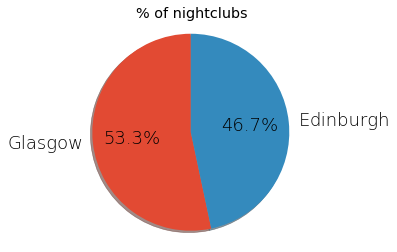

In [257]:
labels = 'Glasgow', 'Edinburgh'
sizes = [8, 7]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={ 'weight':'50', 'size':'18'})
ax1.axis('equal') 

plt.title('% of nightclubs')

plt.show()

this shows that people who prefer nightclubs would likely prefer Glasgow to Edinburgh.

This report therefore concludes that tourists coming to Scotland are more likely to chose a city break than any other type of holiday.<br>

This report also concludes that: <br>
If your target audience prefer museums, then Edinburgh is the best Scottish location to market as a holiday destination.<br>
If your target audience are interested in football, they are equally as likely to enjoy Glasgow or Edinburgh.<br>
If your target audience prefer nightclubs, then they are slightly more likely to prefer Glasgow and prefer this as a holiday destination.


These findings give merit to the well known Scottish saying: <br>
<p style="text-align:center"><b>"Edinburgh is the pretty, stuck up lassie in the nightclub, <br> but Glesga is the wan that'll show ye a good time"</b></p> 

<p style="text-align:right"><i>~ Scottish Proverb </i></p>